# Tidy Data

"Tidy Data" paper by Hadley Wickman, in 2014. 
 - Formalizes the way we can describe the shape of our data.
 - Give us a goal when formatting our data.
 - Provide a standard way to organize data values within a dataset.

Principles of tidy data
 1. Columns represent separate variables
 2. Rows represent individual observations
 3. Each type of observational unit forms a table.
 
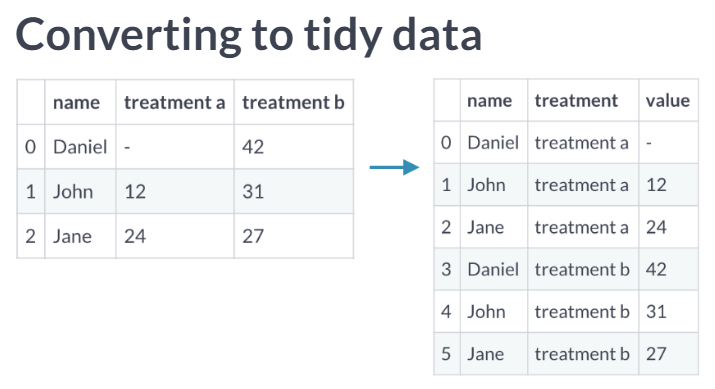

There are data formats that are better for reporting, and data formats that are better for analysis. 

Tidy data makes it easier to dix common data problems.

The data problem we are trying to fix:
 - Columns containing values, instead of variables
   * Solution = **pd.melt()**
   * To melt our data, we first specify the dataframe we want to use and which column or columns we want to hold constant.
   * If we don't specify the **id_vars**, the melt method will use all the columns not specified.
   * The default variable column name is not always what we want, we can rename the new melted columns with **var_name**.

There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. 

In [21]:
# Import 
import pandas as pd
import numpy as np

airquality = pd.read_csv('airquality.csv')
print(airquality.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [16]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month','Day'])

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


In [17]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(airquality, id_vars=['Month','Day'], var_name='Measurement', value_name='Reading')

# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day Measurement  Reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


# Pivoting data

The oppsite process of melting is called **pivot**. 
 - We turned columns into rows.
 - We will take each unique value of a variable and turn them into separate columns. 
 
We may want to pivot our data is to reshape our data from an analysis-friendly shape into a report-friendly shape.

Also we could use the pivot when our dataset violates a tidy data principle: where rows do not contain observations. 
 - Multiple variables stored in the same column. 
 
**pivot()**
 - index = denote which column or columns we want to fix during the pivot
 - columns = the column we want to pivot into new columns. 
 - values = the values to be used to fill in the new columns created from the pivot. 
 
**pivot_table()**
 - Has a parameter that specifies how to deal with duplicate values. 
 - Example: Can aggregate the duplicate values by taking their average. 
 - Is very similar to pivot.
 - aggfunc = whats happens when there are multiple entries for a given pivoted variable. 

In [18]:
# Print the head of airquality_melt
print(airquality_melt.head())

# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='Measurement', values='Reading')

# Print the head of airquality_pivot
print(airquality_pivot.head())

   Month  Day Measurement  Reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN
Measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [19]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [26]:
# Pivot table the airquality_dup: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='Measurement', values='Reading', aggfunc=np.mean)

# Print the head of airquality_pivot before reset_index
print(airquality_pivot.head())

# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

Measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


# Beyond **melt()** and **pivot()**

Are the basic tools needed to reshape and clean data. 

Another common data problem is:
 - Columns contain multiple bits of information

Melt is used to extract some specific value and extrapolate to another column.

In [28]:
tb = pd.read_csv('tb.csv')
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [29]:
# Melt tb: tb_melt
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


# Splitting columns 

Another common way multiple variables are stored in columns is with a delimiter.

You now need to use Python's built-in string method called **.split()**. By default, this method will split a string into parts separated by a space. 

In [30]:
ebola = pd.read_csv('ebola.csv')

ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


# Concatenating data

Data no always come in 1 monolithic file or table for you to load. 
 - 5 million row dataset may be broken into 5 separate datasets
   * Usually, because it's easier to store and share data this way
 - You may habe a new data file for each day
   * Time series data (stocks)

It's important how to deal with these type of data to combine each dataset and then combine them or to clean each dataset and then combine them. 

When we **concatenate data**, we can combine 2 dataframes into a single dataframe. 
 - To do this we use: **pd.concat()** function - we pass a list of dataframes as an argument
 - The indexes mantains from the original dataframe.
   * It's important to check this, cause we could not manipulate the data by using its index.
 - To reset the index number, we could use the **ignore_index=True** parameter in the *concat()* function.

In [32]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1,uber2, uber3])

# Print the shape of row_concat
print(row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

NameError: name 'uber1' is not defined

Think of column-wise concatenation of data as stitching data together from the sides instead of the top and bottom. 

To perform this action, you use the same **pd.concat()** function, but this time with the keyword argument **axis=1**. The default, **axis=0**, is for a row-wise concatenation.

In [33]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt, status_country], axis=1)

# Print the shape of ebola_tidy
print(ebola_tidy.shape)

# Print the head of ebola_tidy
print(ebola_tidy.head())

NameError: name 'status_country' is not defined

# Finding and concatenating data

In order to concatenate DataFrames:
 - They must be loaded and placed into a Python list
 - We can load each dataset individually if there were only a few datasets to be concatenated. 
 
What if there are thousands?
 - We can use the **glob()** function in the glob library to find files, and use a Python *for loop* to read in all the data files. 

## Globbing 

Is a simple way for Python to do filename pattern matching. 

We can use various wildcards (* = any string and ? = allow to match 1 character) to specify a filename pattern we are looking for
- Wildcard is a symbol that will match any arbitrary number of characters.
  - Any csv file = *.csv
  - Any single character = file_?.csv
 
Returns a list of file names

Can use this list of file names to systematically load into pandas dataframes

Globbing will give us a list of filenames.

## The plan

Load files from globbing into **pandas**

Add all the dataframes into a list

Pass this list of dataframes to the **concat()** function to concatenate multiple datasets all at once.

In [34]:
# Import the module
import glob

csv_files = glob.glob('*.csv')
print(csv_files)

['airquality.csv', 'census.csv', 'dob_job_application_filings_subset.csv', 'ebola.csv', 'MNIST.csv', 'tb.csv', 'titanic.csv', 'winequality-red.csv', 'winequality-white.csv']


One way we can create a list of dataframes is by using a **for loop**

In [37]:
# Initialize an empty list
list_data = []

# Create a for loop to convert the csv files into dataframes
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)

data_concat = pd.concat(list_data, sort=False)

print(data_concat.head())

   Ozone  Solar.R  Wind  Temp  Month  Day Illinois    M   0  89600  ...  \
0   41.0    190.0   7.4  67.0    5.0  1.0      NaN  NaN NaN    NaN  ...   
1   36.0    118.0   8.0  72.0    5.0  2.0      NaN  NaN NaN    NaN  ...   
2   12.0    149.0  12.6  74.0    5.0  3.0      NaN  NaN NaN    NaN  ...   
3   18.0    313.0  11.5  62.0    5.0  4.0      NaN  NaN NaN    NaN  ...   
4    NaN      NaN  14.3  56.0    5.0  5.0      NaN  NaN NaN    NaN  ...   

   Pclass  Sex  Age SibSp Parch Ticket  Fare  Cabin  Embarked  \
0     NaN  NaN  NaN   NaN   NaN    NaN   NaN    NaN       NaN   
1     NaN  NaN  NaN   NaN   NaN    NaN   NaN    NaN       NaN   
2     NaN  NaN  NaN   NaN   NaN    NaN   NaN    NaN       NaN   
3     NaN  NaN  NaN   NaN   NaN    NaN   NaN    NaN       NaN   
4     NaN  NaN  NaN   NaN   NaN    NaN   NaN    NaN       NaN   

  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol

1. We will iterate though each of the filenames, each filename iteration we will call 'filename'. 
2. Then, we can use pandas to load the filename into a dataframe. 
3. Append the loaded dataframe into a list. 

We can use this list to concatenate the list of dataframes into a single dataframe.

In [38]:
# Import necessary modules
import pandas as pd
import glob

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

['airquality.csv', 'census.csv', 'dob_job_application_filings_subset.csv', 'ebola.csv', 'MNIST.csv', 'tb.csv', 'titanic.csv', 'winequality-red.csv', 'winequality-white.csv']
   Illinois  M  0  89600  95012
0  Illinois  M  1  88445  91829
1  Illinois  M  2  88729  89547
2  Illinois  M  3  88868  90037
3  Illinois  M  4  91947  91111
4  Illinois  M  5  93894  89802


In [39]:
# Import necessary modules
import pandas as pd
import glob

# Write the pattern: pattern
pattern = '*.csv'

# Save all file matches: csv_files
csv_files = glob.glob(pattern)

# Print the file names
print(csv_files)

# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

# Print the head of csv2
print(csv2.head())

['airquality.csv', 'census.csv', 'dob_job_application_filings_subset.csv', 'ebola.csv', 'MNIST.csv', 'tb.csv', 'titanic.csv', 'winequality-red.csv', 'winequality-white.csv']
   Illinois  M  0  89600  95012
0  Illinois  M  1  88445  91829
1  Illinois  M  2  88729  89547
2  Illinois  M  3  88868  90037
3  Illinois  M  4  91947  91111
4  Illinois  M  5  93894  89802


# Merge Dat 

Stitching together data that was once a single dataset
 - Not the only way data can be combined

Panda has the same capabilities to join tables

**Merging** = allows the analyst to combine disparate datasets based on a common set of columns. 
 - To do this we use the pandas **merge()** function. 

Types of merges:
 - One-to-one
 - Many-to-one / one-to-many
 - Many-to-many
 
The only difference is the DataFrames you are merging.

Here, you'll be using survey data that contains readings that William Dyer, Frank Pabodie, and Valentina Roerich took in the late 1920s and 1930s while they were on an expedition towards Antarctica. The dataset was taken from a sqlite database from the Software Carpentry SQL lesson (http://swcarpentry.github.io/sql-novice-survey/).

In [40]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print o2o
print(o2o)

NameError: name 'site' is not defined

In [41]:
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Print m2o
print(m2o)

NameError: name 'site' is not defined

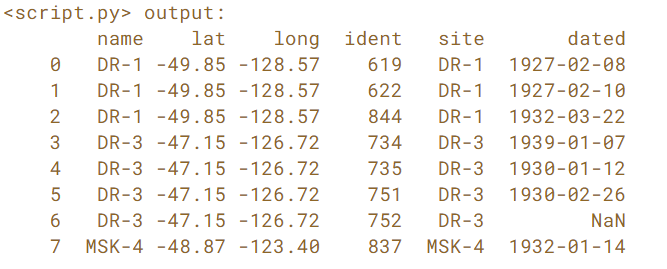

In [42]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

# Print the first 20 lines of m2m
print(m2m.head(20))


NameError: name 'site' is not defined

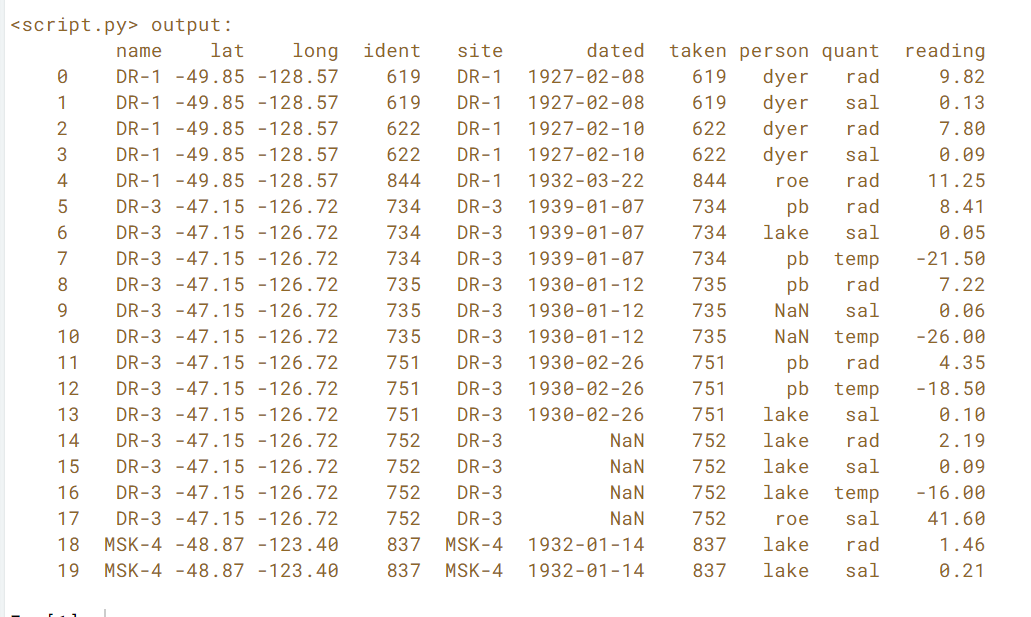